In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("datasets/train.csv")

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.50,Ideal,D,VS2,62.3,55.0,5.11,5.07,3.17,1845
1,1,1.54,Good,I,VS1,63.6,60.0,7.30,7.33,4.65,10164
2,2,1.32,Very Good,J,SI2,61.7,60.0,6.95,7.01,4.31,5513
3,3,1.20,Ideal,I,SI1,62.1,55.0,6.83,6.79,4.23,5174
4,4,1.73,Premium,I,SI1,61.2,60.0,7.67,7.65,4.69,10957


In [4]:
df["cut"].unique() #categorical variable

array(['Ideal', 'Good', 'Very Good', 'Premium', 'Fair'], dtype=object)

In [5]:
df["color"].unique() #categorical variable

array(['D', 'I', 'J', 'G', 'E', 'H', 'F'], dtype=object)

In [6]:
df["clarity"].unique() #categorical variable

array(['VS2', 'VS1', 'SI2', 'SI1', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [7]:
df.shape

(40455, 11)

In [8]:
df["cut"].value_counts()

Ideal        16152
Premium      10321
Very Good     9040
Good          3729
Fair          1213
Name: cut, dtype: int64

In [9]:
df["color"].value_counts()

G    8469
E    7282
F    7199
H    6210
D    5098
I    4091
J    2106
Name: color, dtype: int64

In [10]:
df["clarity"].value_counts()

SI1     9758
VS2     9272
SI2     6895
VS1     6151
VVS2    3799
VVS1    2692
IF      1321
I1       567
Name: clarity, dtype: int64

In [11]:
#Las etiquetas de color tienen una escala de pureza, así que reasigno las puntuaciones donde 7 es el diamante más claro y 1 el más amarillento
color_dict = {

    "D":7,
    "E":6,
    "F":5,
    "G":4,
    "H":3,
    "I":2,
    "J":1
}

df["color"] = df["color"].apply(lambda x: color_dict[x])

In [12]:
#Hacemos lo mismo para clarity

clarity_dict = {

    "IF":8,
    "VVS1":7,
    "VVS2":6,
    "VS1":5,
    "VS2":4,
    "SI1":3,
    "SI2":2,
    "I1":1
}

df["clarity"] = df["clarity"].apply(lambda x: clarity_dict[x])

In [13]:
#Repetimos el mismo proceso anterior con cut
cut_dict = {

    "Ideal":5,
    "Premium":4,
    "Very Good":3,
    "Good":2,
    "Fair":1
}
df["cut"] = df["cut"].apply(lambda x: cut_dict[x])

In [14]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.50,5,7,4,62.3,55.0,5.11,5.07,3.17,1845
1,1,1.54,2,2,5,63.6,60.0,7.30,7.33,4.65,10164
2,2,1.32,3,1,2,61.7,60.0,6.95,7.01,4.31,5513
3,3,1.20,5,2,3,62.1,55.0,6.83,6.79,4.23,5174
4,4,1.73,4,2,3,61.2,60.0,7.67,7.65,4.69,10957


In [15]:
df = df.set_index("id")

In [16]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.50,5,7,4,62.3,55.0,5.11,5.07,3.17,1845
1,1.54,2,2,5,63.6,60.0,7.30,7.33,4.65,10164
2,1.32,3,1,2,61.7,60.0,6.95,7.01,4.31,5513
3,1.20,5,2,3,62.1,55.0,6.83,6.79,4.23,5174
4,1.73,4,2,3,61.2,60.0,7.67,7.65,4.69,10957


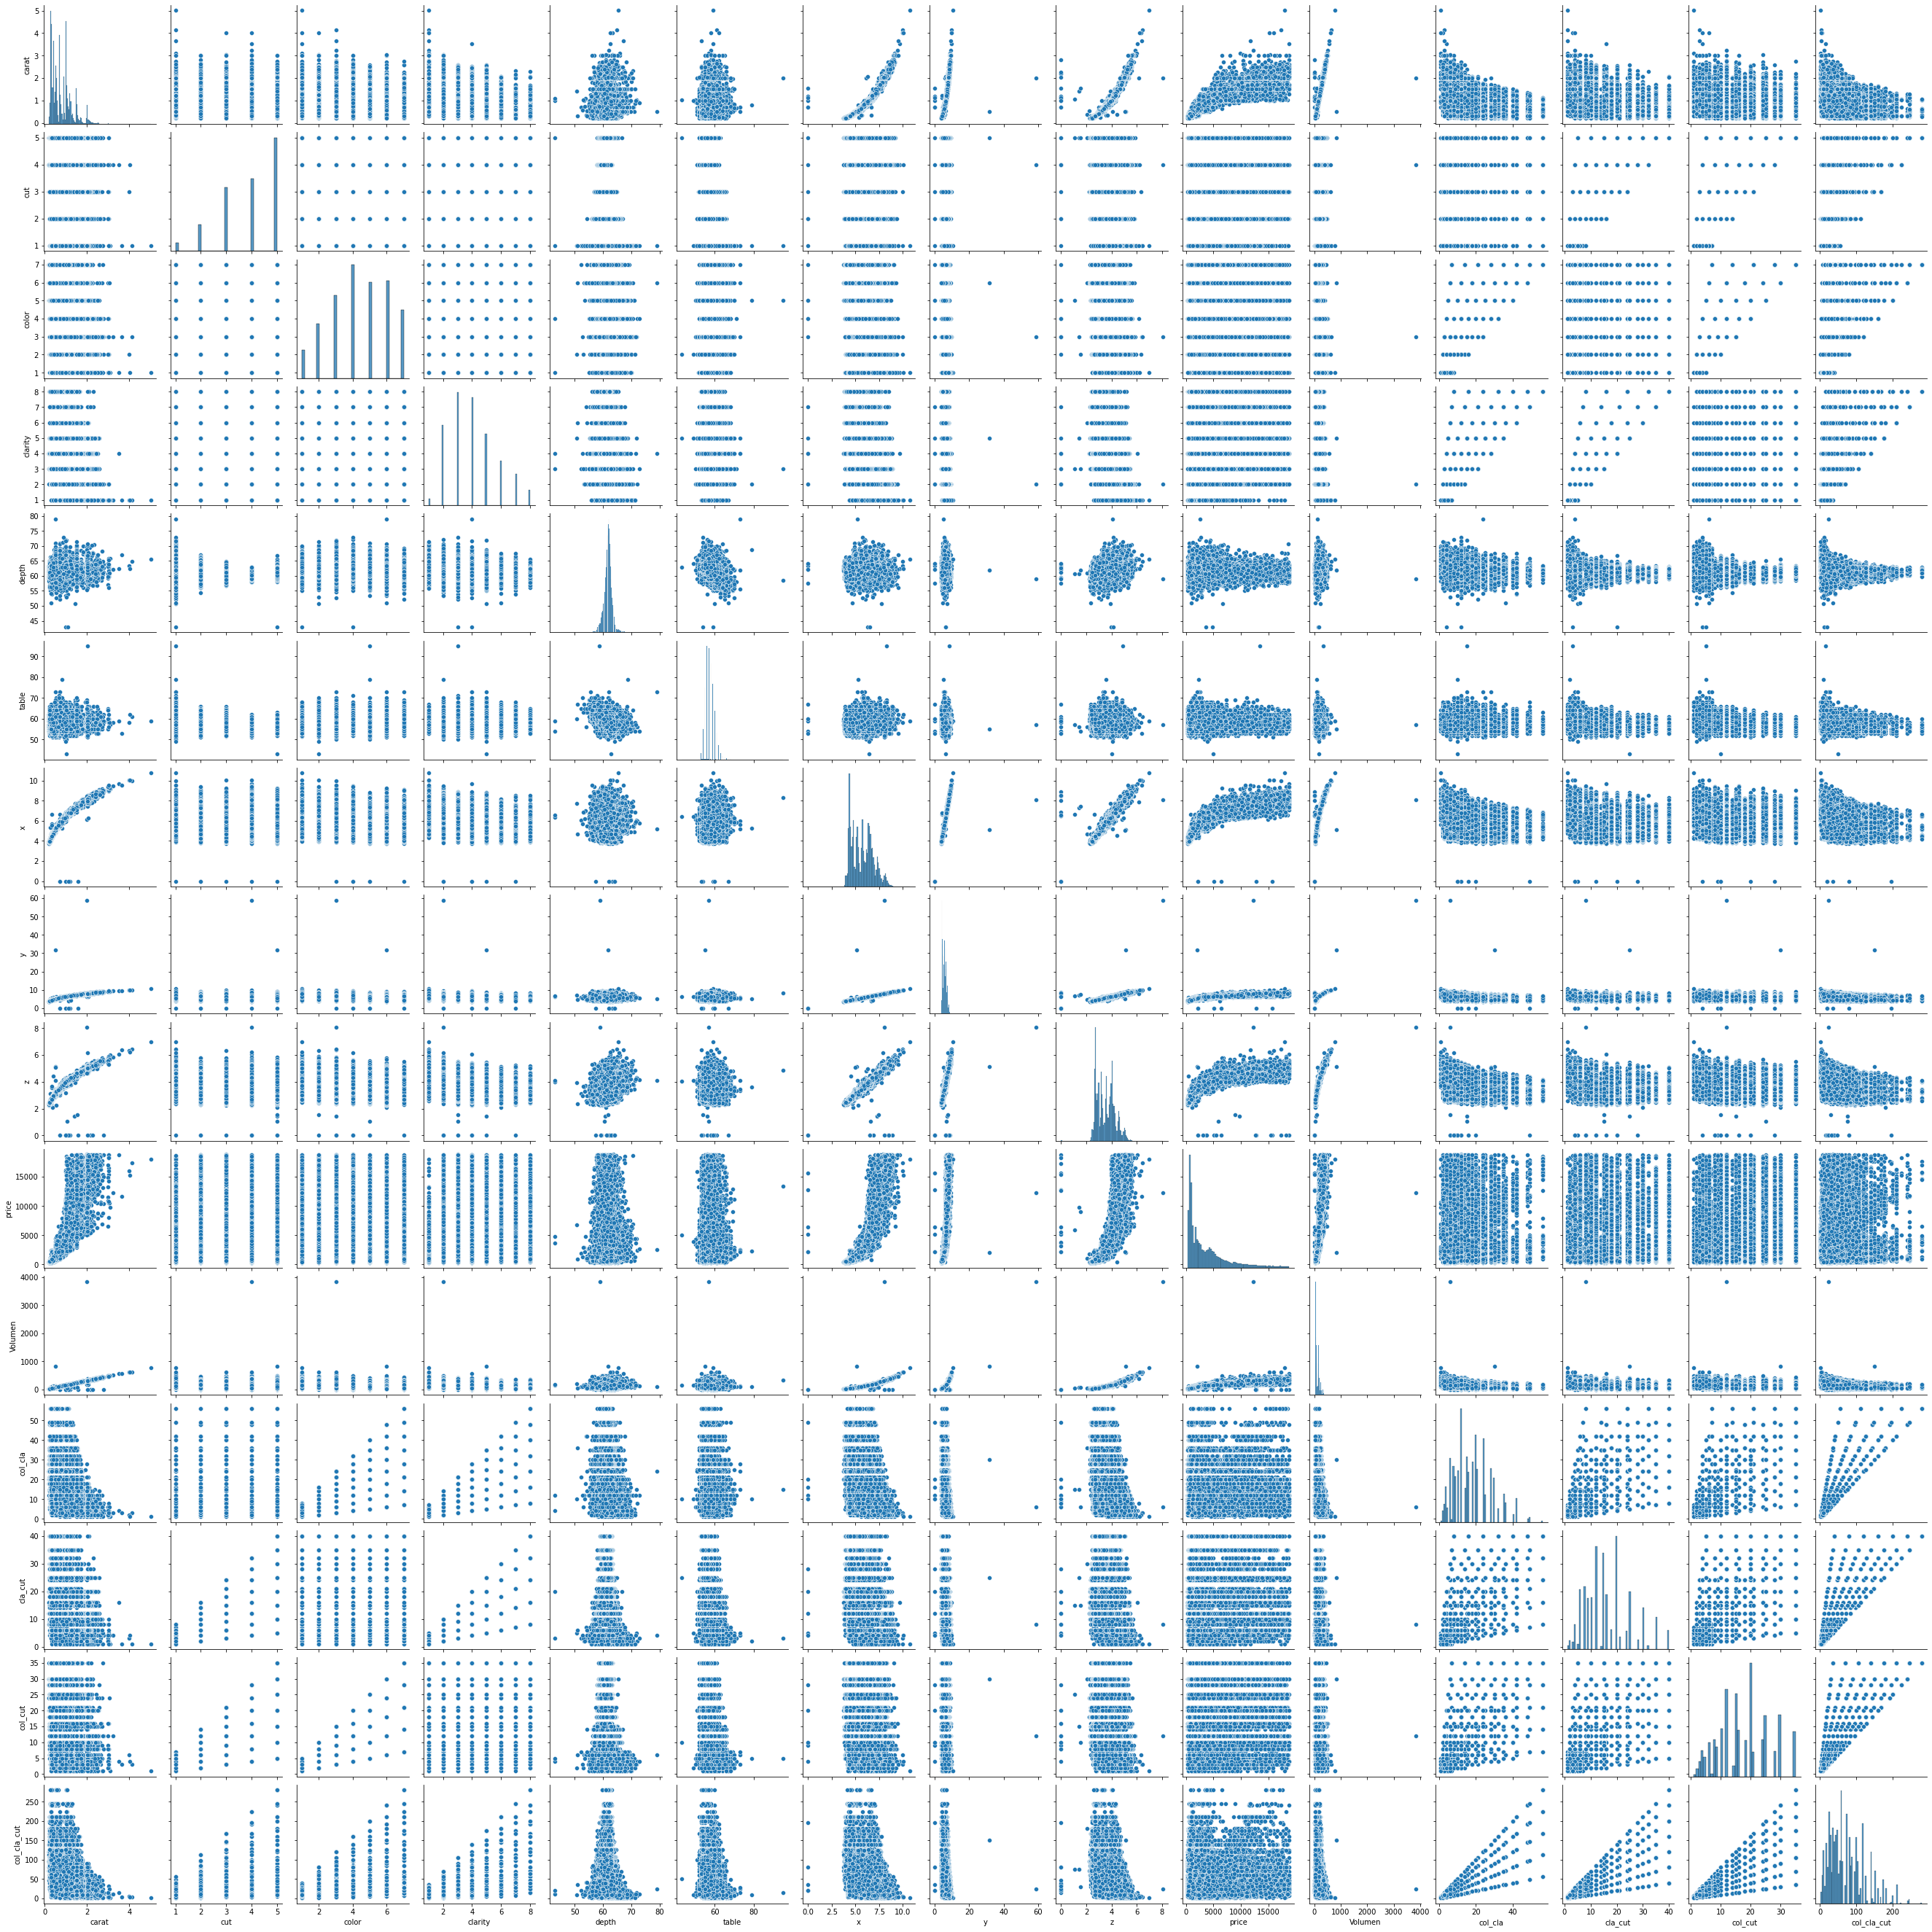

In [41]:
sns.pairplot(df)

In [42]:
#En la celda superior observamos los datos mediante un pairplot

In [17]:
#Creamos una columna nueva que nos de el volumen estimado del diamante
df["Volumen"] = df["x"]*df["y"]*df["z"]

In [18]:
#Creamos también columnas para combinar color, claridad y corte de diferentes formas:

In [19]:
df["col_cla"] = df["color"]*df["clarity"]

In [20]:
df["cla_cut"] = df["clarity"]*df["cut"]

In [21]:
df["col_cut"] = df["color"]*df["cut"]

In [22]:
df["col_cla_cut"] = df["color"]*df["clarity"]*df["cut"]

In [23]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,Volumen,col_cla,cla_cut,col_cut,col_cla_cut
id,,,,,,,,,,,,,,,
0,0.50,5,7,4,62.3,55.0,5.11,5.07,3.17,1845,82.127409,28,20,35,140
1,1.54,2,2,5,63.6,60.0,7.30,7.33,4.65,10164,248.816850,10,10,4,20
2,1.32,3,1,2,61.7,60.0,6.95,7.01,4.31,5513,209.981045,2,6,3,6
3,1.20,5,2,3,62.1,55.0,6.83,6.79,4.23,5174,196.169211,6,15,10,30
4,1.73,4,2,3,61.2,60.0,7.67,7.65,4.69,10957,275.188095,6,12,8,24


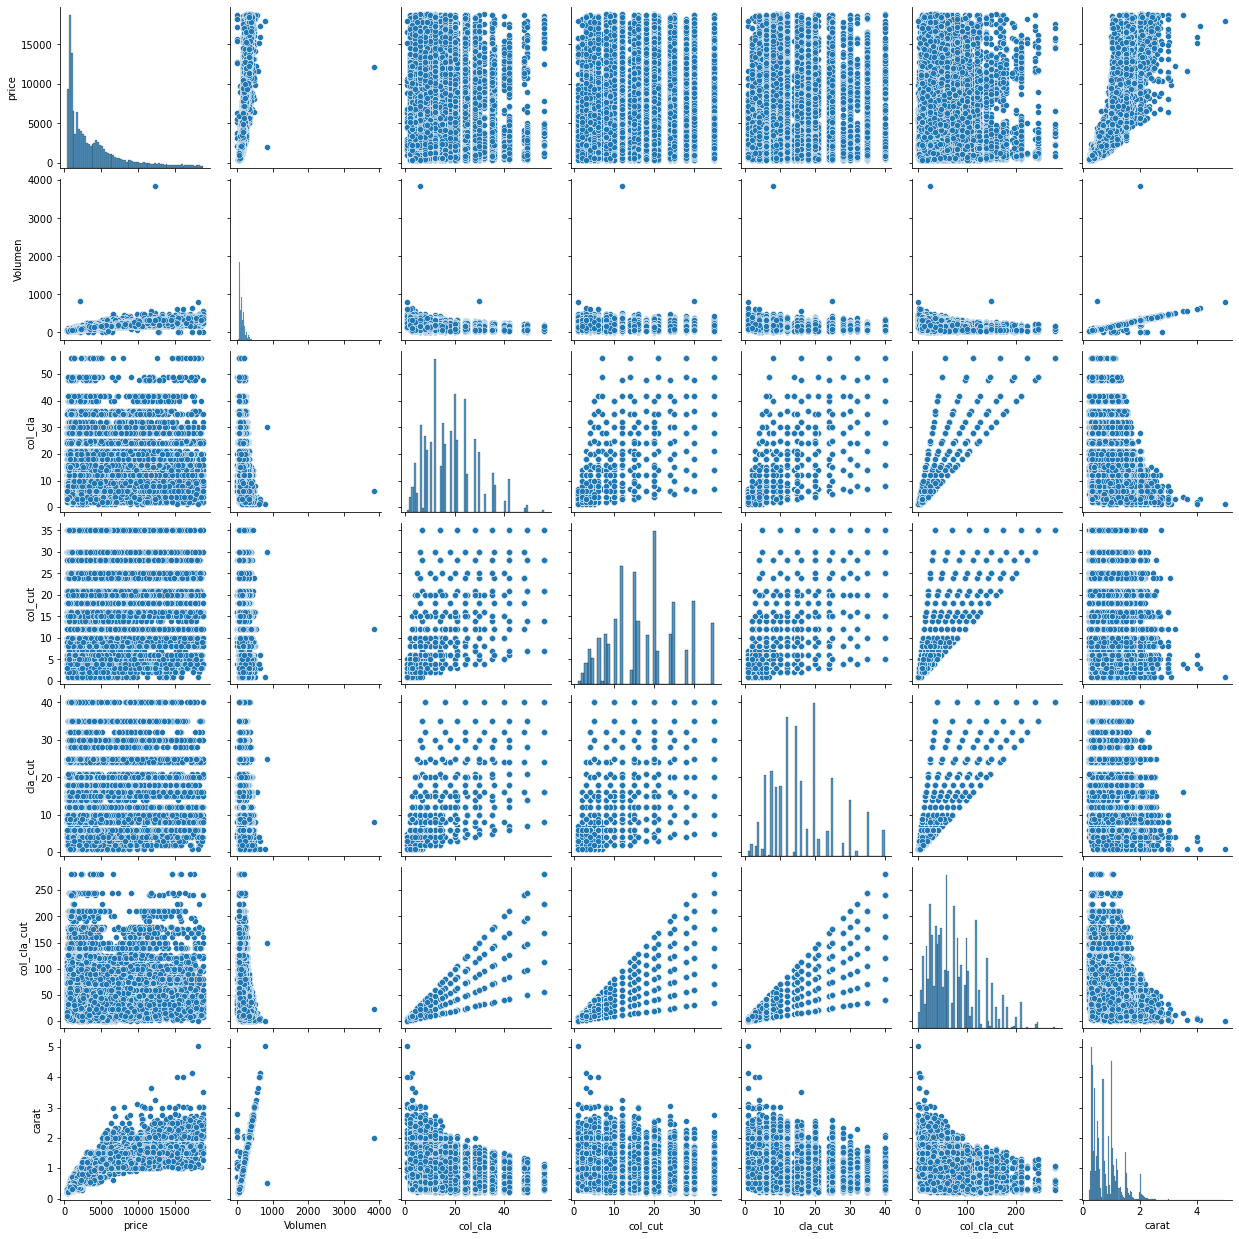

In [47]:
sns.pairplot(data= df[["price","Volumen","col_cla","col_cut","cla_cut", "col_cla_cut","carat"]])

In [24]:
# Ponemos el precio al final
cols = list(df.columns)
cols.remove('price')
cols.append('price')

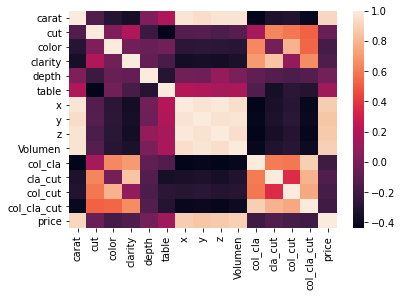

In [25]:
dfcorr = df[cols].corr()
sns.heatmap(dfcorr)

In [26]:
#Vemos que el precio con lo que más correlaciona es con el volumen 

In [27]:
X = df[["Volumen"]]
y = df["price"]

In [28]:
#Entrenamos un modelo de regresión lineal usando sklearn
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8 )

In [29]:
mod = LinearRegression()

In [30]:
mod.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = mod.predict(X_train)
y_test_pred = mod.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
mean_squared_error(y_test, y_test_pred)**0.5

1539.6730271757178

In [34]:
test_df = pd.read_csv("datasets/predict.csv")

In [35]:
test_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.45,Premium,E,SI1,62.8,58.0,4.88,4.84,3.05
1,1,1.23,Ideal,H,SI1,61.0,56.0,6.96,6.92,4.23
2,2,0.33,Ideal,I,IF,61.8,55.0,4.46,4.47,2.76
3,3,0.51,Premium,D,VS2,58.0,60.0,5.29,5.26,3.06
4,4,0.40,Premium,E,VS2,62.2,59.0,4.71,4.74,2.94


In [36]:
test_df.set_index("id")

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.45,Premium,E,SI1,62.8,58.0,4.88,4.84,3.05
1,1.23,Ideal,H,SI1,61.0,56.0,6.96,6.92,4.23
2,0.33,Ideal,I,IF,61.8,55.0,4.46,4.47,2.76
3,0.51,Premium,D,VS2,58.0,60.0,5.29,5.26,3.06
4,0.40,Premium,E,VS2,62.2,59.0,4.71,4.74,2.94
...,...,...,...,...,...,...,...,...,...
13480,0.30,Very Good,I,SI1,62.2,57.0,4.25,4.27,2.65
13481,1.01,Ideal,J,VS2,62.3,55.0,6.40,6.44,4.00
13482,0.33,Ideal,F,VVS1,61.9,55.0,4.43,4.46,2.75


In [37]:
test_df["Volumen"] = test_df["x"]*test_df["y"]*test_df["z"]

In [38]:
test_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,Volumen
0,0,0.45,Premium,E,SI1,62.8,58.0,4.88,4.84,3.05,72.038560
1,1,1.23,Ideal,H,SI1,61.0,56.0,6.96,6.92,4.23,203.730336
2,2,0.33,Ideal,I,IF,61.8,55.0,4.46,4.47,2.76,55.023912
3,3,0.51,Premium,D,VS2,58.0,60.0,5.29,5.26,3.06,85.145724
4,4,0.40,Premium,E,VS2,62.2,59.0,4.71,4.74,2.94,65.636676


In [44]:
results = mod.predict(test_df[["Volumen"]])

In [45]:
test_df["price"] = results
test_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,Volumen,price
0,0,0.45,Premium,E,SI1,62.8,58.0,4.88,4.84,3.05,72.038560,1332.978811
1,1,1.23,Ideal,H,SI1,61.0,56.0,6.96,6.92,4.23,203.730336,7270.927875
2,2,0.33,Ideal,I,IF,61.8,55.0,4.46,4.47,2.76,55.023912,565.792611
3,3,0.51,Premium,D,VS2,58.0,60.0,5.29,5.26,3.06,85.145724,1923.977539
4,4,0.40,Premium,E,VS2,62.2,59.0,4.71,4.74,2.94,65.636676,1044.319471


In [46]:
test_df[["price"]].to_csv("submission.csv")